In [1]:
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

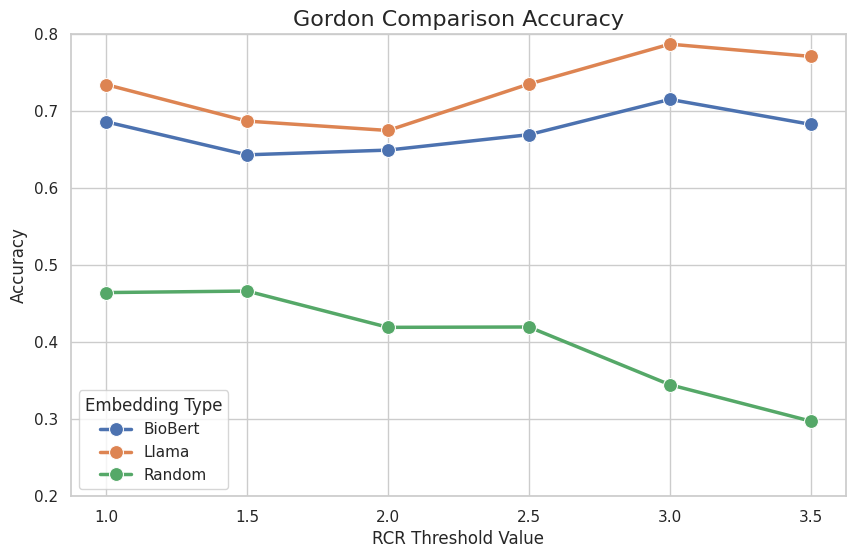

In [85]:
# Data: Thresholds and corresponding accuracies for each embedding
thresholds = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
bio_bert = [0.686252, 0.643414, 0.649552, 0.669596, 0.715393, 0.682959]
llama = [0.734609, 0.687212, 0.675020, 0.735372, 0.787154, 0.771234]
random = [0.464524, 0.466478, 0.419357, 0.419806, 0.344850, 0.297543]

# Convert to a pandas DataFrame
df = pd.DataFrame({
    'Threshold': thresholds * 3,  # Repeat the thresholds for each embedding type
    'Accuracy': bio_bert + llama + random,  # Combine all the accuracy values
    'Embedding': ['BioBert'] * len(thresholds) + ['Llama'] * len(thresholds) + ['Random'] * len(thresholds)  # Add the labels
})

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Threshold", y="Accuracy", hue="Embedding", marker="o", linewidth=2.5, markersize=10) # Increased linewidth and markersize

# Customize the plot
plt.title("Gordon Comparison Accuracy", fontsize=16)
plt.xlabel("RCR Threshold Value")
plt.ylabel("Accuracy")
plt.legend(title="Embedding Type")

plt.ylim(top=0.8, bottom=0.2)

plt.savefig('comparison_plot_thicker.png', dpi=300, bbox_inches='tight') # PNG, high DPI, changed filename
plt.show()

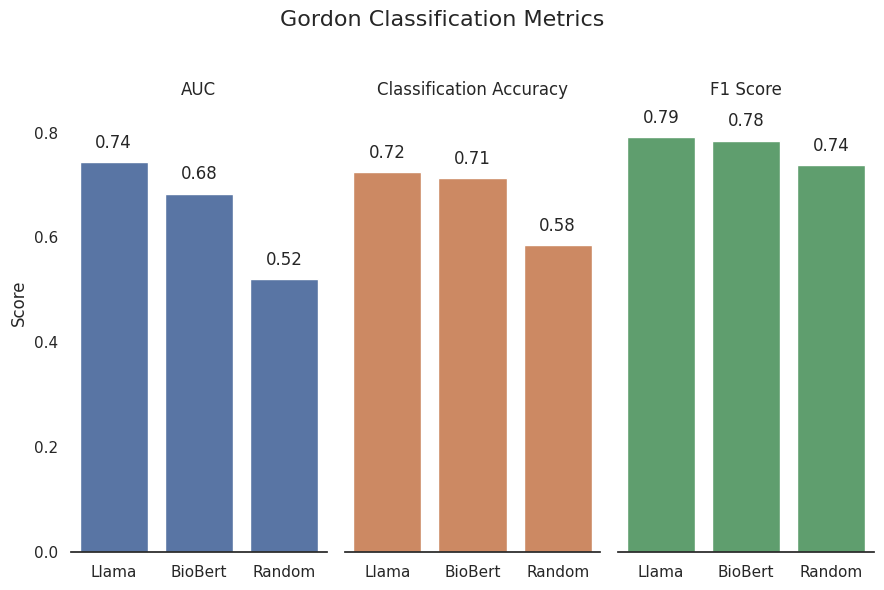

In [86]:
# Data for F1, AUC, and Accuracy
data = {
    'Embedding': ['Llama', 'BioBert', 'Random'],
    'AUC': [0.7431, 0.6837, 0.5206],
    'Classification Accuracy': [0.7243, 0.7126, 0.5850],
    'F1 Score': [0.7913, 0.7841, 0.7382]
}

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Reshape the DataFrame to long format
df_long = pd.melt(df, id_vars=['Embedding'], value_vars=['AUC', 'Classification Accuracy', 'F1 Score'],
                  var_name='Metric', value_name='Score')

# Set the Seaborn style to 'white' (no gridlines)
sns.set(style="white")

# Create the facet grid (three subplots, one for each metric)
g = sns.catplot(x='Embedding', y='Score', hue='Metric', col='Metric',
                data=df_long, kind='bar', height=6, aspect=1.0, dodge=False)

# Customize the plot
g.set_axis_labels('', 'Score')
g.set_titles("{col_name}", y=0.9, fontsize=14) # Added y parameter to move titles down
g.set(ylim=(0, 0.95))  # Ensuring y-axis starts at 0 and goes to 1

# Remove gridlines
g.despine(left=True)

# Loop through each subplot to add labels above bars
for ax in g.axes.flat:
    for p in ax.patches:
        if p.get_height() > 0.001: # Add condition to check height
            # Add the text label above each bar
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.02,  # Position of the label
                    f'{p.get_height():.2f}',  # Value to show (2 decimal places)
                    ha='center', va='bottom', fontsize=12)

# Adjust the figure size to 10x6
g.fig.set_size_inches(9, 6)
g.legend.remove()

# Add the overall title
g.fig.suptitle('Gordon Classification Metrics', fontsize=16)

plt.savefig('classification_plot.png', dpi=300, bbox_inches='tight') # PNG, high DPI
plt.tight_layout()
plt.show()

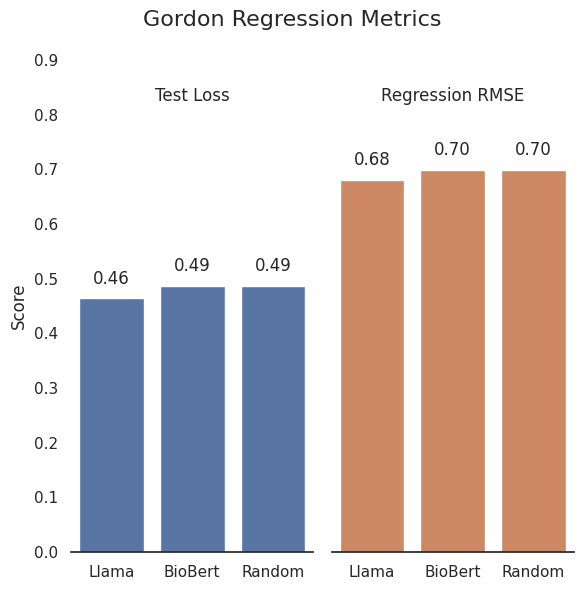

In [87]:
# Data for Test Loss and Test RMSE
data = {
    'Embedding': ['Llama', 'BioBert', 'Random'],
    'Test Loss': [0.4636, 0.4872, 0.4863],
    'Regression RMSE': [0.6809, 0.6993, 0.6984]
}

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Reshape the DataFrame to long format
df_long = pd.melt(df, id_vars=['Embedding'], value_vars=['Test Loss', 'Regression RMSE'],
                  var_name='Metric', value_name='Value') # Changed 'Score' to 'Value' to reflect data

# Set the Seaborn style to 'white' (no gridlines)
sns.set(style="white")

# Create the facet grid (two subplots, one for each metric)
g = sns.catplot(x='Embedding', y='Value', hue='Metric', col='Metric',
                data=df_long, kind='bar', height=6, aspect=1.0, dodge=False)

# Customize the plot
g.set_axis_labels('', 'Score') # Changed 'Score' to 'Value'
g.set_titles("{col_name}") # Modified titles to just show Metric name
g.set(ylim=(0, 0.9)) # Adjusted ylim dynamically, increased max for label space

# Remove gridlines
g.despine(left=True)

# Loop through each subplot to add labels above bars
for ax in g.axes.flat:
    for p in ax.patches:
        if p.get_height() > 0.001: # Add condition to check height
            # Add the text label above each bar
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.02,  # Position of the label
                    f'{p.get_height():.2f}',  # Value to show (4 decimal places for loss/RMSE)
                    ha='center', va='bottom', fontsize=12)

# Adjust the figure size to 10x6
g.fig.set_size_inches(6, 6)
g.legend.remove()

# Add the overall title
g.fig.suptitle('Gordon Regression Metrics', fontsize=16) # Changed title to reflect regression

# Move the subplot titles down
g.set_titles("{col_name}", y=0.9) # Moved titles down

plt.savefig('regression_plot.png', dpi=300, bbox_inches='tight') # PNG, high DPI
plt.tight_layout()
plt.show()

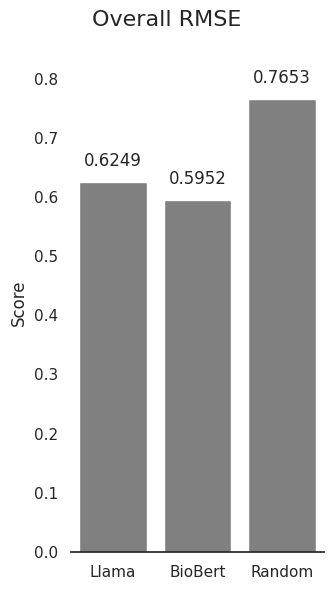

In [88]:
# Data for Overall RMSE
data = {
    'Embedding': ['Llama', 'BioBert', 'Random'],
    'Overall RMSE': [0.6249, 0.5952, 0.7653]
}

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Set the Seaborn style to 'white' (no gridlines)
sns.set(style="white")

# Create the bar plot
plt.figure(figsize=(3.5, 6)) # Adjust figure size if needed
ax = sns.barplot(x='Embedding', y='Overall RMSE', data=df, color='gray') # Use a green color from Seaborn palette

# Customize the plot
ax.set_xlabel('')
ax.set_ylabel('Score')
ax.set_ylim(0, max(df['Overall RMSE']) * 1.1) # Dynamic y-axis limit

# Remove gridlines
sns.despine(left=True, bottom=False) # Keep bottom spine for x-axis labels

# Add labels above bars
for p in ax.patches:
    if p.get_height() > 0.001:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.02,
                f'{p.get_height():.4f}',
                ha='center', va='bottom', fontsize=12)

# Add the overall title
plt.suptitle('Overall RMSE', fontsize=16)

plt.savefig('overall_rmse_plot.png', dpi=300, bbox_inches='tight') # PNG, high DPI
plt.tight_layout() # Adjust layout to make space for suptitle
plt.show()

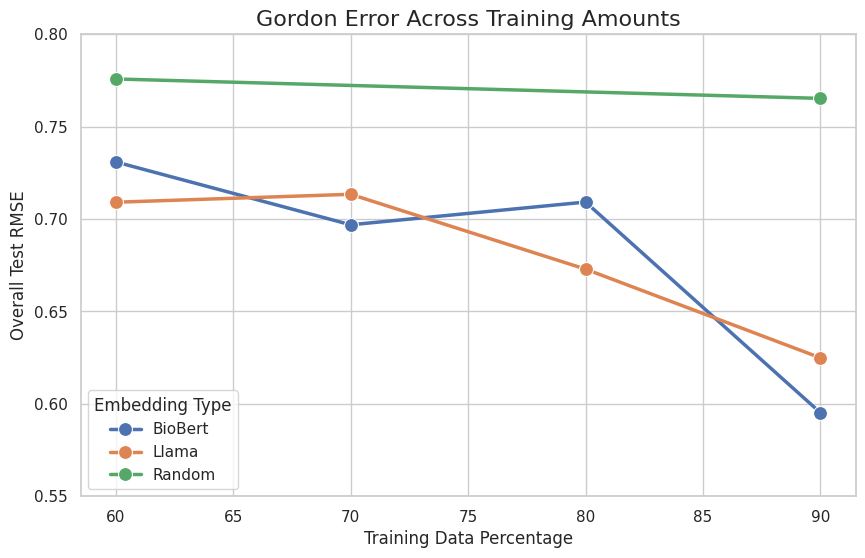

In [89]:
thresholds = [60, 70, 80, 90]
bio_bert = [0.7309, 0.6969, 0.7092, 0.5952]
llama = [0.7091, 0.7134, 0.6729, 0.6249]
random = [0.7758, None, None, 0.7653]

# Convert to a pandas DataFrame
df = pd.DataFrame({
    'Threshold': thresholds * 3,  # Repeat the thresholds for each embedding type
    'Accuracy': bio_bert + llama + random,  # Combine all the accuracy values
    'Embedding': ['BioBert'] * len(thresholds) + ['Llama'] * len(thresholds) + ['Random'] * len(thresholds)  # Add the labels
})

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Threshold", y="Accuracy", hue="Embedding", marker="o", linewidth=2.5, markersize=10)

# Customize the plot
plt.title("Gordon Error Across Training Amounts", fontsize=16)
plt.xlabel("Training Data Percentage")
plt.ylabel("Overall Test RMSE")
plt.legend(title="Embedding Type")

plt.ylim(top=0.8, bottom=0.55)

plt.savefig('training_data_plot.png', dpi=300, bbox_inches='tight') # PNG, high DPI
plt.show()